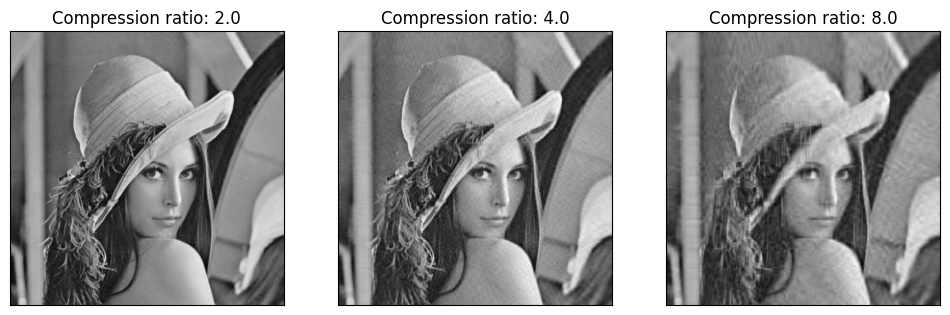

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgfile = "lenna.png" # 512x512x3 X = mpimg.imread(imgfile)
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
    #RGB各有一個512*512的矩陣，將其壓縮成黑白圖

N, p = X.shape
U, E, VT = svd(X, full_matrices = False) #rank=r<m #not full rank
q = np.array([p/4, p/8, p/16]).astype("int") #512/4=128 #512/8=64 #512/16=32
#q = np.array([1, 10, 30])
#q = np.array([100, 200, 300])
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()